# Projet 2 - Machine Learning

### Run - Neural Networks

In [1]:
from Neural_networks import train_and_evaluate_nn_M, plot_losses, train_test_percentage, train_test_percentage_all
from helpers import clean_data, test_accuracy_f1_scores, confusion_matrix_M, separation
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### Import the data

In [2]:
file = '/Users/shrinidhivelan/Desktop/ML_proj2_shri/All_Relative_Results_Cleaned.parquet'
data = pd.read_parquet(file)

### Clean the data

This function tests the number of NaN values, encode the y with the help of an encoder, and returns a dataframe X, a label y naming the exercises and a label y encoded. 

In [3]:
X, y, y_encoded = clean_data(data)

The initial data contains 27187 of NaN values
There is 27187 rows with 100 percents of NaN positional values.
Hence all rows can be removed from our data set.
Label y extracted!
Label y encoded!
Matrix X created!


#### We implement cross validation to find the following parameters we could use for our Neural Networks 

By changing the parameter cross_validation to *True*, we chose to do the cross validation and find the best parameters

In [4]:
# Running this cell to get the needed parameters of running the next cell which would last about 60mins.
best_params = {'hidden_size': 256, 'learning_rate': 0.001, 'batch_size': 32}

In [4]:
# Running this cell, will give you the best params, in order to avoid running it, you can use the parameters previously initialized
y_true_best, y_pred_best, losses_best, best_params = train_and_evaluate_nn_M(X, y_encoded, num_epochs=10, cross_validate = True, Method = 'M1')

Epoch [1/10], Loss: 0.0724
Epoch [2/10], Loss: 0.0604
Epoch [3/10], Loss: 0.0124
Epoch [4/10], Loss: 0.1926
Epoch [5/10], Loss: 0.0291
Epoch [6/10], Loss: 0.1776
Epoch [7/10], Loss: 0.0776
Epoch [8/10], Loss: 0.0713
Epoch [9/10], Loss: 0.0984
Epoch [10/10], Loss: 0.0874
Epoch [1/10], Loss: 0.1406
Epoch [2/10], Loss: 0.1872
Epoch [3/10], Loss: 0.0841
Epoch [4/10], Loss: 0.1687
Epoch [5/10], Loss: 0.1480
Epoch [6/10], Loss: 0.0291
Epoch [7/10], Loss: 0.0893
Epoch [8/10], Loss: 0.1645
Epoch [9/10], Loss: 0.1070
Epoch [10/10], Loss: 0.0135
Epoch [1/10], Loss: 0.3823
Epoch [2/10], Loss: 0.3059
Epoch [3/10], Loss: 0.1211
Epoch [4/10], Loss: 0.1851
Epoch [5/10], Loss: 0.1160
Epoch [6/10], Loss: 0.1428
Epoch [7/10], Loss: 0.0131
Epoch [8/10], Loss: 0.2425
Epoch [9/10], Loss: 0.1072
Epoch [10/10], Loss: 0.1805
Epoch [1/10], Loss: 0.2548
Epoch [2/10], Loss: 0.1008
Epoch [3/10], Loss: 0.2102
Epoch [4/10], Loss: 0.1008
Epoch [5/10], Loss: 0.0726
Epoch [6/10], Loss: 0.0718
Epoch [7/10], Loss: 0.440

### Now we shall train and evaluate our neural networks, according to the parameters that we have found for each method :

- Method 1 (M1) : Remove the time column and do a 50% split of test and train
- Method 2 (M2): Train on 13 participants and test on 12 participants, keeping the time variable
- Method 3 (M3): Train on 50% train/test split based on unique values of the '*Camera*' column
- Method 4 (M4): Train on 50% train/test split based on unique values of the '*Set*' column

##### Replace the paramater Method by 'Mi' for i = 1,2,3,4


In [ ]:
y_true_pos, y_pred_pos, losses_pos = train_and_evaluate_nn_M(X, y_encoded, num_epochs=10, cross_validate = False, Method = 'M1', hidden_size_best=best_params['hidden_size'], learning_rate_best=best_params['learning_rate'], batch_size_best=best_params['batch_size'])
print("\n")
y_true_time, y_pred_time, losses_time = train_and_evaluate_nn_M(X, y_encoded, num_epochs=10, cross_validate = False, Method = 'M2', hidden_size_best=best_params['hidden_size'], learning_rate_best=best_params['learning_rate'], batch_size_best=best_params['batch_size'])
print("\n")
y_true_camera, y_pred_camera, losses_time_camera = train_and_evaluate_nn_M(X, y_encoded, num_epochs=10, cross_validate = False, Method = 'M3', hidden_size_best=best_params['hidden_size'], learning_rate_best=best_params['learning_rate'], batch_size_best=best_params['batch_size'])
print("\n")
y_true_error, y_pred_error, losses_time_error = train_and_evaluate_nn_M(X, y_encoded, num_epochs=10, cross_validate = False, Method = 'M4', hidden_size_best=best_params['hidden_size'], learning_rate_best=best_params['learning_rate'], batch_size_best=best_params['batch_size'])

#### Now we can test the accuracy and the f1 score of each one of these methods, with the help of an auxiliary function :

In [ ]:
test_accuracy_f1_scores(y_true_pos, y_pred_pos, 'M1', 'Neural Networks')
print("\n")
test_accuracy_f1_scores(y_true_time, y_pred_time, 'M2', 'Neural Networks')
print("\n")
test_accuracy_f1_scores(y_true_camera, y_pred_camera, 'M3', 'Neural Networks')
print("\n")
test_accuracy_f1_scores(y_true_error, y_pred_error, 'M4', 'Neural Networks')
print("\n")

print(f"Overall accuracy : {(np.mean(y_true_pos == y_pred_pos)+np.mean(y_true_time == y_pred_time)+np.mean(y_true_camera == y_pred_camera)+np.mean(y_true_error == y_pred_error))/4*100} %")

Test Accuracy for method M1 and model Neural Networks: 94.52%
F1 Score macro for method M1 and model Neural Networks: 0.9474
F1 Score micro for method M1 and model Neural Networks: 0.9452


Test Accuracy for method M2 and model Neural Networks: 93.68%
F1 Score macro for method M2 and model Neural Networks: 0.9405
F1 Score micro for method M2 and model Neural Networks: 0.9368


Test Accuracy for method M3 and model Neural Networks: 95.34%
F1 Score macro for method M3 and model Neural Networks: 0.9559
F1 Score micro for method M3 and model Neural Networks: 0.9534


Test Accuracy for method M4 and model Neural Networks: 95.40%
F1 Score macro for method M4 and model Neural Networks: 0.9562
F1 Score micro for method M4 and model Neural Networks: 0.9540


Overall accuracy : 94.73712358213244 %


#### Plot the losses of each Method in order to visualize the difference :

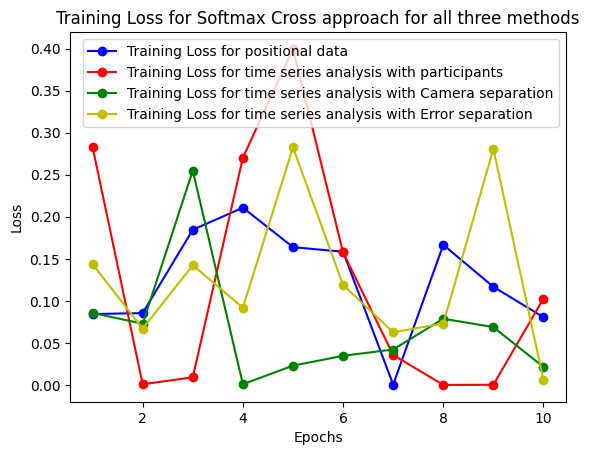

In [ ]:
# Plot the losses with the help of a function created for each method
plot_losses(losses_pos, losses_time, losses_time_camera, losses_time_error)

### Plot normalized confusion matrix for each method, in different colors

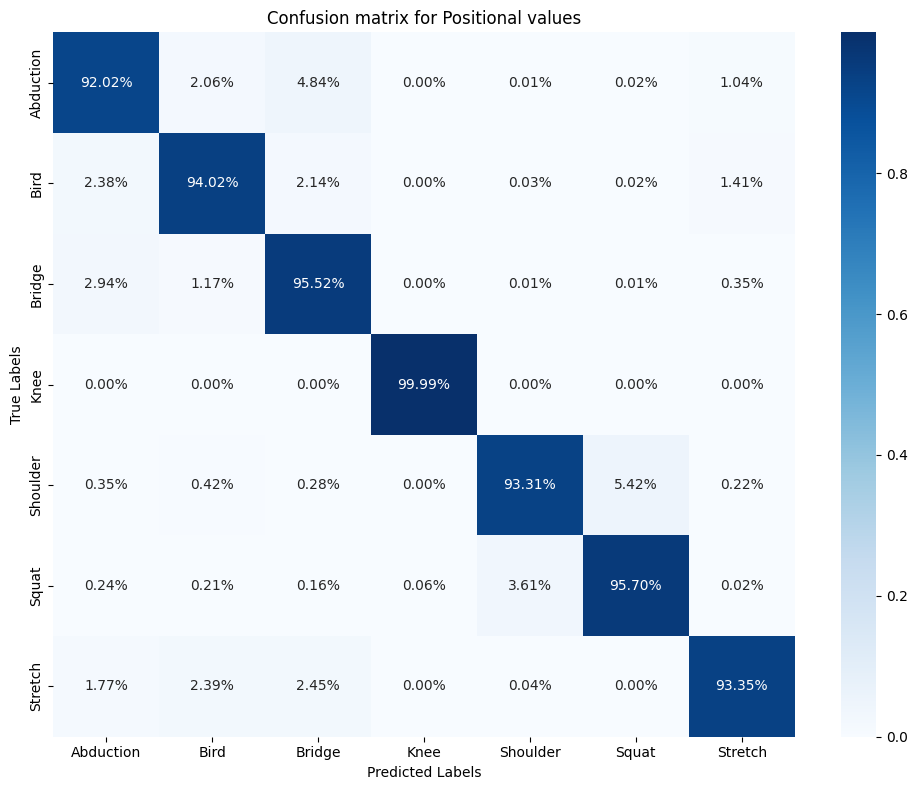

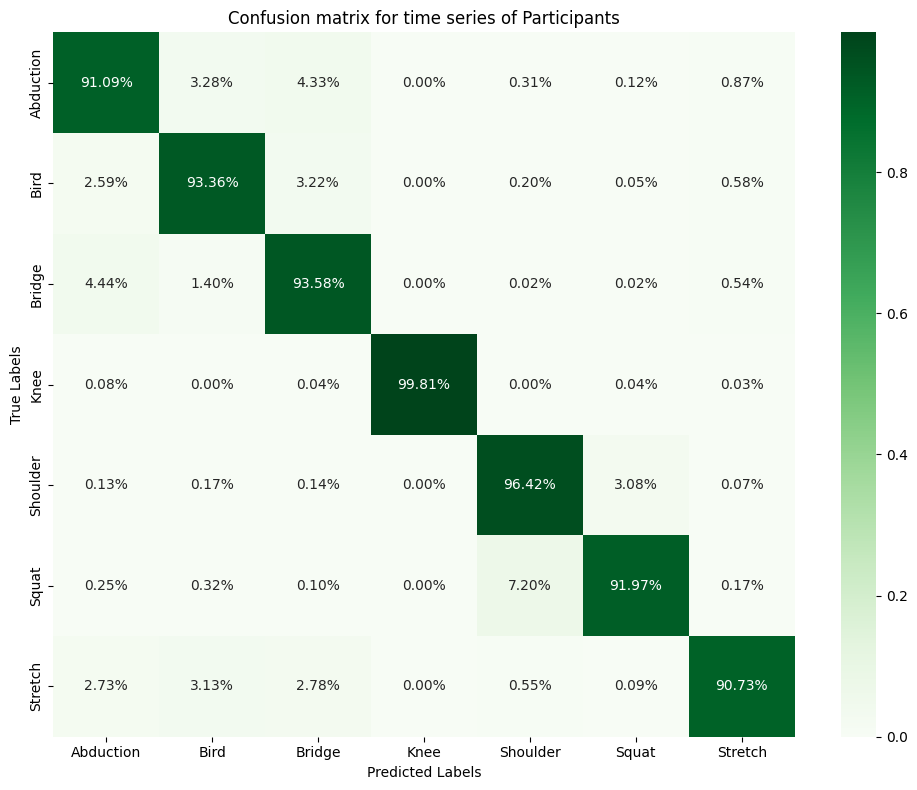

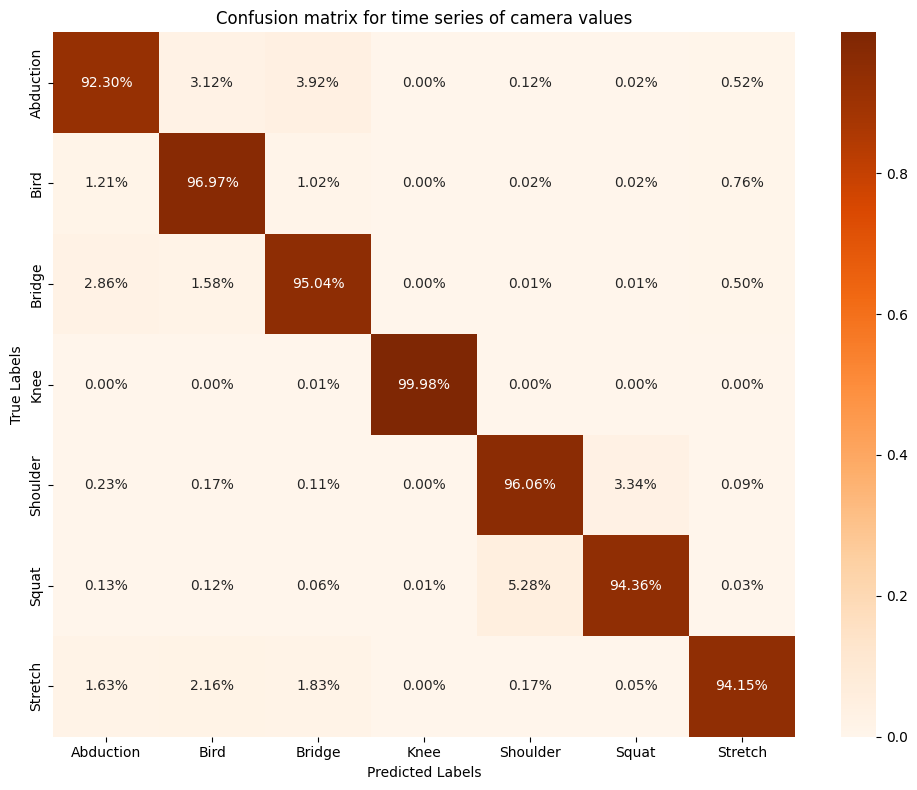

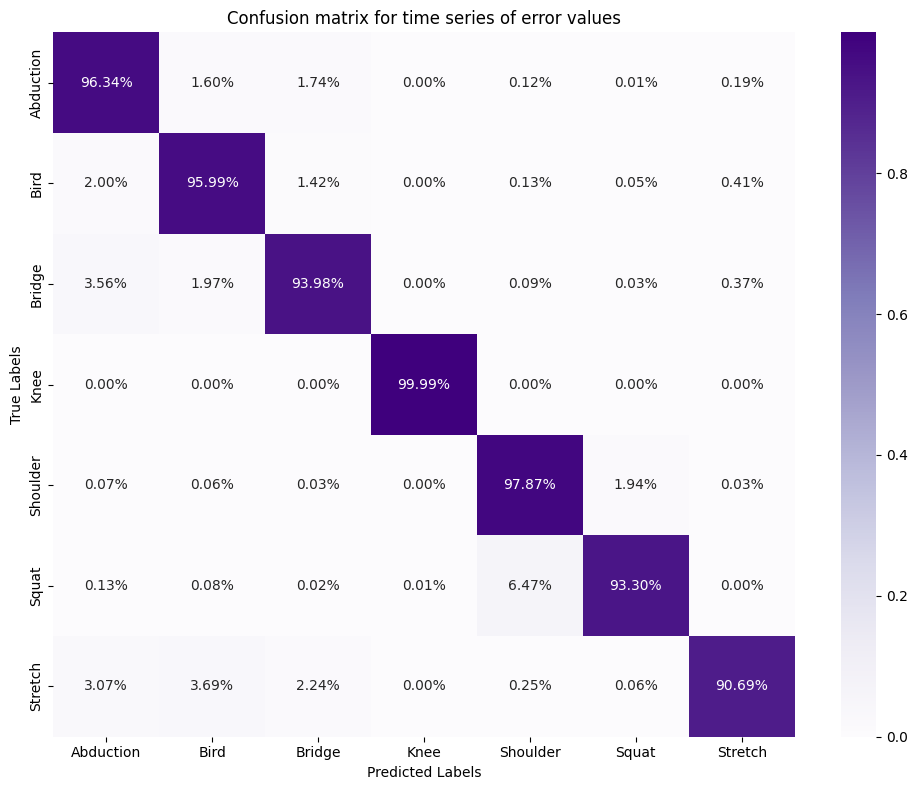

In [ ]:
confusion_matrix_M(y, y_true_pos, y_pred_pos, y_true_time, y_pred_time,y_true_camera, y_pred_camera, y_true_error, y_pred_error)

## *Justifying the 50% choice of train/test split :*
### Look at the accuracy evolution all across train/test sizes for all methods:

Split happening!
Method 1
Split happened!
Element 1/12
Epoch [1/10], Loss: 0.1940
Epoch [2/10], Loss: 0.1424
Epoch [3/10], Loss: 0.1747
Epoch [4/10], Loss: 0.1288
Epoch [5/10], Loss: 0.0335
Epoch [6/10], Loss: 0.2301
Epoch [7/10], Loss: 0.2108
Epoch [8/10], Loss: 0.1512
Epoch [9/10], Loss: 0.1832
Epoch [10/10], Loss: 0.1431
1/12
Split happening!
Method 1
Split happened!
Element 2/12
Epoch [1/10], Loss: 0.3200
Epoch [2/10], Loss: 0.1762
Epoch [3/10], Loss: 0.0618
Epoch [4/10], Loss: 0.0686
Epoch [5/10], Loss: 0.2165
Epoch [6/10], Loss: 0.1838
Epoch [7/10], Loss: 0.0492
Epoch [8/10], Loss: 0.2151
Epoch [9/10], Loss: 0.1266
Epoch [10/10], Loss: 0.2674
2/12
Split happening!
Method 1
Split happened!
Element 3/12
Epoch [1/10], Loss: 0.2565
Epoch [2/10], Loss: 0.2291
Epoch [3/10], Loss: 0.1616
Epoch [4/10], Loss: 0.3007
Epoch [5/10], Loss: 0.0606
Epoch [6/10], Loss: 0.1591
Epoch [7/10], Loss: 0.1506
Epoch [8/10], Loss: 0.2400
Epoch [9/10], Loss: 0.2057
Epoch [10/10], Loss: 0.1968
3/12
Split h

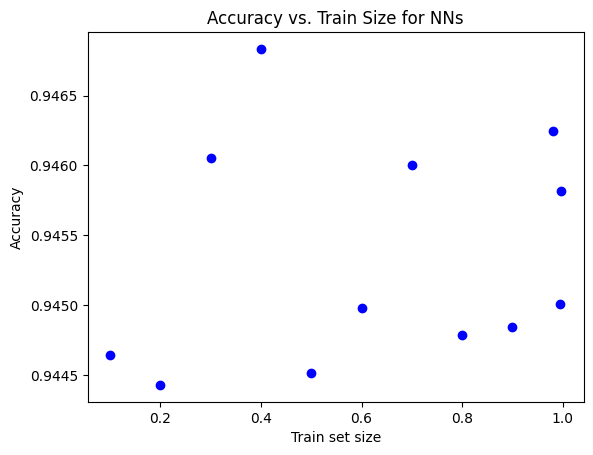

Split happening!
Method 2
Split happened!
Element 1/12
Epoch [1/10], Loss: 0.2372
Epoch [2/10], Loss: 0.1594
Epoch [3/10], Loss: 0.0777
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0719
Epoch [6/10], Loss: 0.2435
Epoch [7/10], Loss: 0.0428
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0001
1/12
Split happening!
Method 2
Split happened!
Element 2/12
Epoch [1/10], Loss: 0.2337
Epoch [2/10], Loss: 0.0583
Epoch [3/10], Loss: 0.1268
Epoch [4/10], Loss: 0.2001
Epoch [5/10], Loss: 0.0690
Epoch [6/10], Loss: 0.0580
Epoch [7/10], Loss: 0.0004
Epoch [8/10], Loss: 0.0001
Epoch [9/10], Loss: 0.3295
Epoch [10/10], Loss: 0.0203
2/12
Split happening!
Method 2
Split happened!
Element 3/12
Epoch [1/10], Loss: 0.0012
Epoch [2/10], Loss: 0.2595
Epoch [3/10], Loss: 0.0007
Epoch [4/10], Loss: 0.1133
Epoch [5/10], Loss: 0.0084
Epoch [6/10], Loss: 0.0733
Epoch [7/10], Loss: 0.1513
Epoch [8/10], Loss: 0.2493
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0659
3/12
Split h

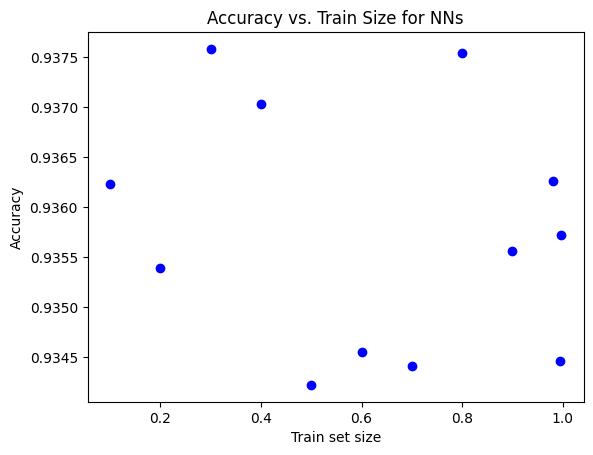

Split happening!
Method 3
Split happened!
Element 1/12
Epoch [1/10], Loss: 0.2667
Epoch [2/10], Loss: 0.0351
Epoch [3/10], Loss: 0.0237
Epoch [4/10], Loss: 0.1110
Epoch [5/10], Loss: 0.1944
Epoch [6/10], Loss: 0.1979
Epoch [7/10], Loss: 0.1549
Epoch [8/10], Loss: 0.1113
Epoch [9/10], Loss: 0.0581
Epoch [10/10], Loss: 0.1199
1/12
Split happening!
Method 3
Split happened!
Element 2/12
Epoch [1/10], Loss: 0.3133
Epoch [2/10], Loss: 0.0619
Epoch [3/10], Loss: 0.1882
Epoch [4/10], Loss: 0.0845
Epoch [5/10], Loss: 0.0479
Epoch [6/10], Loss: 0.1204
Epoch [7/10], Loss: 0.0239
Epoch [8/10], Loss: 0.0225
Epoch [9/10], Loss: 0.0919
Epoch [10/10], Loss: 0.1187
2/12
Split happening!
Method 3
Split happened!
Element 3/12
Epoch [1/10], Loss: 0.0199
Epoch [2/10], Loss: 0.0187
Epoch [3/10], Loss: 0.0881
Epoch [4/10], Loss: 0.1334
Epoch [5/10], Loss: 0.0208
Epoch [6/10], Loss: 0.0818
Epoch [7/10], Loss: 0.0157
Epoch [8/10], Loss: 0.0037
Epoch [9/10], Loss: 0.1782
Epoch [10/10], Loss: 0.0303
3/12
Split h

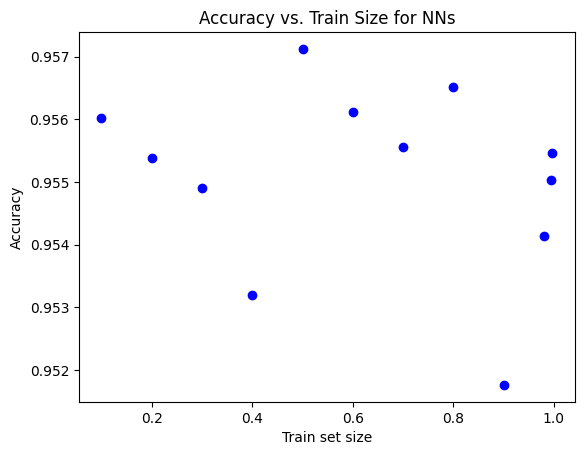

Split happening!
Method 4
Split happened!
Element 1/12
Epoch [1/10], Loss: 0.1264
Epoch [2/10], Loss: 0.0180
Epoch [3/10], Loss: 0.1131
Epoch [4/10], Loss: 0.0113
Epoch [5/10], Loss: 0.0605
Epoch [6/10], Loss: 0.1892
Epoch [7/10], Loss: 0.0456
Epoch [8/10], Loss: 0.1842
Epoch [9/10], Loss: 0.0417
Epoch [10/10], Loss: 0.0489
1/12
Split happening!
Method 4
Split happened!
Element 2/12
Epoch [1/10], Loss: 0.1409
Epoch [2/10], Loss: 0.1262
Epoch [3/10], Loss: 0.0027
Epoch [4/10], Loss: 0.0493
Epoch [5/10], Loss: 0.0735
Epoch [6/10], Loss: 0.0909
Epoch [7/10], Loss: 0.0066
Epoch [8/10], Loss: 0.1306
Epoch [9/10], Loss: 0.1979
Epoch [10/10], Loss: 0.0874
2/12
Split happening!
Method 4
Split happened!
Element 3/12
Epoch [1/10], Loss: 0.0885
Epoch [2/10], Loss: 0.1750
Epoch [3/10], Loss: 0.0965
Epoch [4/10], Loss: 0.0660
Epoch [5/10], Loss: 0.0670
Epoch [6/10], Loss: 0.1394
Epoch [7/10], Loss: 0.0790
Epoch [8/10], Loss: 0.0086
Epoch [9/10], Loss: 0.1803
Epoch [10/10], Loss: 0.0176
3/12
Split h

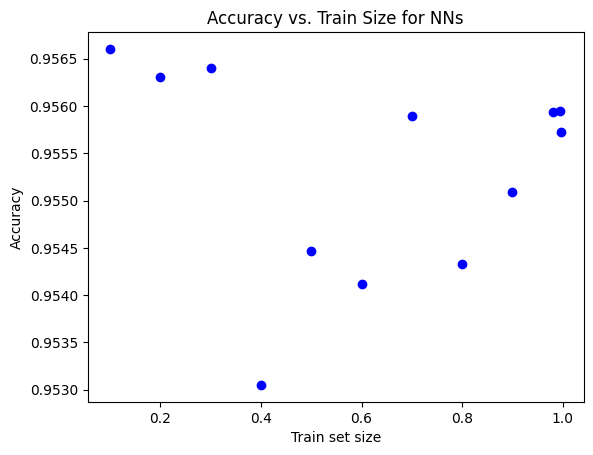

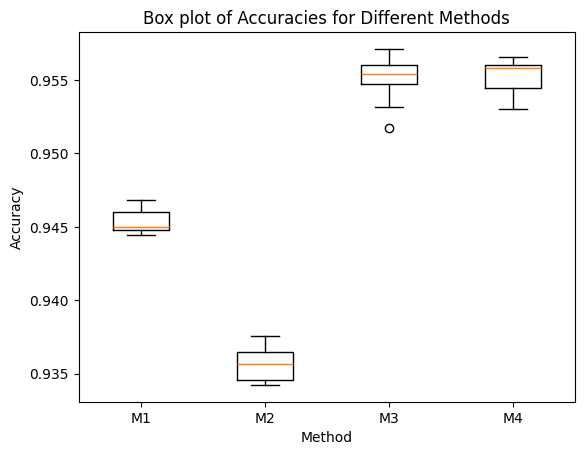

In [4]:
accuracies = train_test_percentage_all(X, y_encoded)